# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from collections import namedtuple, deque
from maddpg import MADDPG

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000178813934
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
import os
current_path = os.getcwd()
ckpt_path_folder = "Tennis_ckpt_path"
ckpt_path_loc = (current_path+"/"+ckpt_path_folder+"/")
print(ckpt_path_loc)

/home/workspace/Tennis_ckpt_path/


In [8]:
import shutil
if os.path.exists(ckpt_path_loc):
    #shutil.rmtree(ckpt_path_loc, ignore_errors=True)
    files = os.listdir(ckpt_path_loc)
    files
else:
    print("The local file directory does not exist")

In [9]:
if not os.path.exists(ckpt_path_loc):
    os.makedirs(ckpt_path_loc)

In [10]:
files = os.listdir(current_path)
files

['config.py',
 '.ipynb_checkpoints',
 'python',
 'workspace_utils.py',
 'Tennis.ipynb',
 '__pycache__',
 'maddpg.py',
 'Tennis_ckpt_path',
 'ddpg_agent.py',
 'Tennis_DDPG_ckpt_path',
 'model.py',
 'unity-environment.log']

In [11]:
# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('Size of state:', state_size)

Number of agents: 2
Size of each action: 2
Size of state: 24


In [12]:
import time
start = time.time()
# Set parameters for training
n_episodes_max = 10000     # number of training episodes
max_t = 1000               # number of timesteps per episode
TARGET_SCORE = 0.5
actor_ckpt_path = 'Tennis_ckpt_path/checkpoint_actor.pth'
critic_ckpt_path = 'Tennis_ckpt_path/checkpoint_critic.pth'

from config import Config
# config settings
config = Config()
config.num_agents = num_agents
config.state_size = state_size
config.action_size = action_size
config.random_seed = 123
config.actor_fc1_units = 128
config.actor_fc2_units = 128
config.critic_fcs1_units = 128
config.critic_fc2_units = 128
config.buffer_size = int(1e6)
config.batch_size = 128
config.gamma = 0.99
config.tau = 0.2
config.lr_actor = 2e-4
config.lr_critic = 2e-4
config.weight_decay = 0 
config.ou_mu = 0
config.ou_theta =0.15
config.ou_sigma =0.1
config.update_every_t_steps = 2
config.num_of_updates = 1

In [13]:
from ddpg_agent import Agent
# Create the Agent
agent = Agent(config)

[AGENT INFO] DDPG constructor initialized parameters:
 num_agents=2 
 state_size=24 
 action_size=2 
 random_seed=123 
 actor_fc1_units=128 
 actor_fc2_units=128 
 critic_fcs1_units=128 
 critic_fc2_units=128 
 buffer_size=1000000 
 batch_size=128 
 gamma=0.99 
 tau=0.2 
 lr_actor=0.0002 
 lr_critic=0.0002 
 weight_decay=0 
 ou_mu=0
 ou_theta=0.15
 ou_sigma=0.1
 update_every_t_steps=2
 num_of_updates=1

[MODEL INFO] Actor initialized with parameters : state_size=24 action_size=2 seed=123 fc1_units=128 fc2_units=128
[MODEL INFO] Actor initialized with parameters : state_size=24 action_size=2 seed=123 fc1_units=128 fc2_units=128
[MODEL INFO] CRITIC initialized with parameters : state_size=24 action_size=2 seed=123 fcs1_units=128 fc2_units=128
[MODEL INFO] CRITIC initialized with parameters : state_size=24 action_size=2 seed=123 fcs1_units=128 fc2_units=128


In [14]:
def ddpg(n_episodes=10000, max_t=1000,
        actor_ckpt_path = actor_ckpt_path, 
        critic_ckpt_path = critic_ckpt_path):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    mean_scores = []
    moving_avg_scores = []             # list containing the averaged over all agents for 100 consecutive episodes
    
    scores_window = deque(maxlen=100)  # last 100 scores
    start_time = time.time()
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]        # reset the environment
        states = env_info.vector_observations                    # get the current state
        scores = np.zeros(num_agents)                            # initialize score for each agent
        agent.reset()
        final_score = 0
        timestep = time.time()
        
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)          # select an action
            env_info = env.step(actions)[brain_name]             # send all actions to tne environment
            next_states = env_info.vector_observations           # get next state (for each agent)
            rewards = env_info.rewards                           # get reward (for each agent)
            dones = env_info.local_done                          # see if episode finished
            
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states                                 # roll over the state to next time step
            scores += rewards                                    # update the score
            if np.any(dones):                                    # exit loop if episode finished
                break 
        
        duration = time.time() - timestep                        # calculate the elapsed time
        
        avg_scores_all_agent = np.mean(scores)
        scores_window.append(avg_scores_all_agent)               # save average score for all agnets in the episode to the time window
        final_score = np.mean(scores_window)
        mean_scores.append(avg_scores_all_agent)
        moving_avg_scores.append(final_score) 
        
        #print('\rEpisode {} ({}s)\tMin: {:.2f}\tMax: {:.2f}\tMean: {:.2f}'.format(i_episode, round(duration), np.min(scores), np.max(scores), np.mean(scores))) 
        if i_episode % 100 == 0:
            print('\rEpisode {} ({}min)\tMoving Average Score (over time window): {:.2f}'.format(i_episode, round((time.time() - start_time)/60), final_score))
        
        if final_score>=TARGET_SCORE and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, final_score))

            torch.save(agent.actor_local.state_dict(), actor_ckpt_path)
            torch.save(agent.critic_local.state_dict(), critic_ckpt_path)
            break
    return mean_scores, moving_avg_scores

In [15]:
from ddpg_agent import Agent
# Create the Agent
agent = Agent(config)

[AGENT INFO] DDPG constructor initialized parameters:
 num_agents=2 
 state_size=24 
 action_size=2 
 random_seed=123 
 actor_fc1_units=128 
 actor_fc2_units=128 
 critic_fcs1_units=128 
 critic_fc2_units=128 
 buffer_size=1000000 
 batch_size=128 
 gamma=0.99 
 tau=0.2 
 lr_actor=0.0002 
 lr_critic=0.0002 
 weight_decay=0 
 ou_mu=0
 ou_theta=0.15
 ou_sigma=0.1
 update_every_t_steps=2
 num_of_updates=1

[MODEL INFO] Actor initialized with parameters : state_size=24 action_size=2 seed=123 fc1_units=128 fc2_units=128
[MODEL INFO] Actor initialized with parameters : state_size=24 action_size=2 seed=123 fc1_units=128 fc2_units=128
[MODEL INFO] CRITIC initialized with parameters : state_size=24 action_size=2 seed=123 fcs1_units=128 fc2_units=128
[MODEL INFO] CRITIC initialized with parameters : state_size=24 action_size=2 seed=123 fcs1_units=128 fc2_units=128


In [16]:
# Train the Agent
from workspace_utils import active_session
with active_session():
    scores, avgs = ddpg(n_episodes=n_episodes_max, 
                        max_t= max_t,
                        actor_ckpt_path=actor_ckpt_path,
                        critic_ckpt_path=critic_ckpt_path)

Episode 100 (0min)	Moving Average Score (over time window): -0.00
Episode 200 (0min)	Moving Average Score (over time window): 0.02
Episode 300 (1min)	Moving Average Score (over time window): 0.03
Episode 400 (1min)	Moving Average Score (over time window): 0.01
Episode 500 (1min)	Moving Average Score (over time window): 0.04
Episode 600 (2min)	Moving Average Score (over time window): 0.19
Episode 700 (4min)	Moving Average Score (over time window): 0.36
Episode 800 (7min)	Moving Average Score (over time window): 0.41
Episode 900 (9min)	Moving Average Score (over time window): 0.39
Episode 1000 (11min)	Moving Average Score (over time window): 0.29
Episode 1100 (13min)	Moving Average Score (over time window): 0.31
Episode 1200 (15min)	Moving Average Score (over time window): 0.22
Episode 1300 (17min)	Moving Average Score (over time window): 0.41

Environment solved in 1321 episodes!	Average Score: 0.50


In [17]:
end = time.time()
elapsed = (end - start) / 60.0 # in minutes
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed))


Elapsed Time: 18.28 mins.


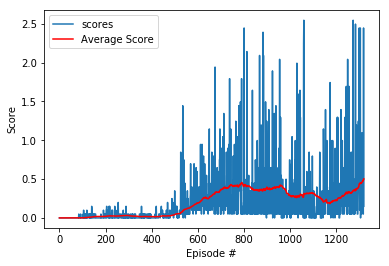

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend();
plt.show()

In [19]:
agent.actor_local.load_state_dict(torch.load(actor_ckpt_path))
agent.critic_local.load_state_dict(torch.load(critic_ckpt_path))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 1.3950000209733844


In [20]:
from maddpg import MADDPG
# Create the Agent
maagent = MADDPG(config)

[AGENT INFO] MADDPG constructor initialized parameters:
 num_agents=2 
 state_size=24 
 action_size=2 
 random_seed=123 
 actor_fc1_units=128 
 actor_fc2_units=128 
 critic_fcs1_units=128 
 critic_fc2_units=128 
 buffer_size=1000000 
 batch_size=128 
 gamma=0.99 
 tau=0.2 
 lr_actor=0.0002 
 lr_critic=0.0002 
 weight_decay=0 
 ou_mu=0
 ou_theta=0.15
 ou_sigma=0.1
 update_every_t_steps=2

[AGENT INFO] DDPG constructor initialized parameters:
 num_agents=2 
 state_size=24 
 action_size=2 
 random_seed=123 
 actor_fc1_units=128 
 actor_fc2_units=128 
 critic_fcs1_units=128 
 critic_fc2_units=128 
 buffer_size=1000000 
 batch_size=128 
 gamma=0.99 
 tau=0.2 
 lr_actor=0.0002 
 lr_critic=0.0002 
 weight_decay=0 
 ou_mu=0
 ou_theta=0.15
 ou_sigma=0.1
 update_every_t_steps=2
 num_of_updates=1

[MODEL INFO] Actor initialized with parameters : state_size=24 action_size=2 seed=123 fc1_units=128 fc2_units=128
[MODEL INFO] Actor initialized with parameters : state_size=24 action_size=2 seed=123 fc

In [21]:
def maddpg(n_episodes=10000, max_t=1000,
        actor_ckpt_path = actor_ckpt_path, 
        critic_ckpt_path = critic_ckpt_path):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    mean_scores = []
    moving_avg_scores = []             # list containing the averaged over all agents for 100 consecutive episodes
    
    scores_window = deque(maxlen=100)  # last 100 scores
    start_time = time.time()
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]        # reset the environment
        states = env_info.vector_observations                    # get the current state
        scores = np.zeros(num_agents)                            # initialize score for each agent
        maagent.reset()
        final_score = 0
        timestep = time.time()
        
        for t in range(max_t):
            actions = maagent.act(states, add_noise=True)          # select an action
            env_info = env.step(actions)[brain_name]             # send all actions to tne environment
            next_states = env_info.vector_observations           # get next state (for each agent)
            rewards = env_info.rewards                           # get reward (for each agent)
            dones = env_info.local_done                          # see if episode finished
            
            maagent.step(states, actions, rewards, next_states, dones, t)
            states = next_states                                 # roll over the state to next time step
            scores += rewards                                    # update the score
            if np.any(dones):                                    # exit loop if episode finished
                break 
        
        duration = time.time() - timestep                        # calculate the elapsed time
        
        avg_scores_all_agent = np.mean(scores)
        scores_window.append(avg_scores_all_agent)               # save average score for all agnets in the episode to the time window
        final_score = np.mean(scores_window)
        mean_scores.append(avg_scores_all_agent)
        moving_avg_scores.append(final_score) 
        
        #print('\rEpisode {} ({}s)\tMin: {:.2f}\tMax: {:.2f}\tMean: {:.2f}'.format(i_episode, round(duration), np.min(scores), np.max(scores), np.mean(scores))) 
        if i_episode % 100 == 0:
            print('\rEpisode {} ({}min)\tMoving Average Score (over time window): {:.2f}'.format(i_episode, round((time.time() - start_time)/60), final_score))
            maagent.save_agents()
        if final_score>=TARGET_SCORE and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, final_score))

            maagent.save_agents()
            break
    return mean_scores, moving_avg_scores

In [22]:
# Train the Agent
from workspace_utils import active_session
with active_session():
    scores, avgs = maddpg(n_episodes=n_episodes_max, 
                        max_t= max_t,
                        actor_ckpt_path=actor_ckpt_path,
                        critic_ckpt_path=critic_ckpt_path)

Episode 100 (0min)	Moving Average Score (over time window): -0.00


AttributeError: 'MADDPG' object has no attribute 'agents'

In [ ]:
end = time.time()
elapsed = (end - start) / 60.0 # in minutes
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend();
plt.show()

In [ ]:
maagent.actor_local.load_state_dict(torch.load(actor_ckpt_path))
maagent.critic_local.load_state_dict(torch.load(critic_ckpt_path))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
env.close()